In [1]:
pip install -U tsfresh workalendar astral "featuretools[tsfresh]" sktime

  Using cached sktime-0.8.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.1 MB)
     |████████████████████████████████| 9.5 MB 7.7 MB/s 
  Using cached numba-0.54.1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-0.54.0-2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.4 MB)
  Using cached numba-0.53.1-cp37-cp37m-manylinux2014_x86_64.whl (3.4 MB)
  Using cached numba-0.53.0-cp37-cp37m-manylinux2014_x86_64.whl (3.4 MB)
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of sktime to determine which version is compatible with other requirements. This could take a while.
  Using cached sktime-0.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)


In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Log and Power Transformations**

* Create a distribution that's not normal.
* Create log-transform it.
* Plot the original and transformed distribution for comparison.
* Apply a statistical test for normality.

In [3]:
import numpy as np

np.random.seed(0)
pts = 10000
vals = np.random.lognormal(0, 1.0, pts)

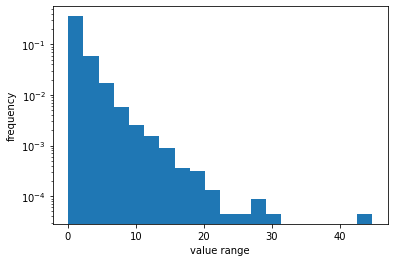

In [4]:
plt.hist(vals, bins=20, density=True)
plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

* Apply the standard normalization to z-scores.
* Apply a statistical normality test on one of the transformed distributions.

In [5]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

vals_mm = minmax_scale(vals)
scaler = StandardScaler()
vals_ss = scaler.fit_transform(vals.reshape(-1, 1))
_, p = normaltest(vals_ss.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00


In [6]:
_, p = normaltest(vals_mm.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00


* A normal-like distribution are not getting from transformation by standard scaling and the minmax transformation.

* Plot the original and the standard scaled distribution against each other.
* The two distributions look the same except for the scale.

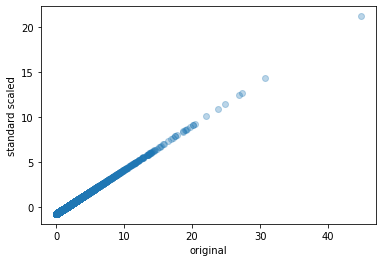

In [7]:
plt.scatter(vals, vals_ss, alpha=0.3)
plt.ylabel("standard scaled")
plt.xlabel("original");

* Use a log transformation.

In [8]:
from statsmodels.stats.diagnostic import kstest_normal

log_transformed = np.log(vals)
_, p = kstest_normal(log_transformed)  # stats.normaltest
print(f"significance: {p:.2f}")

significance: 0.31


* Can't reject the null hypothesis (p_values > threshold).

In [9]:
np.std(log_transformed)

0.9875565681761207

In [10]:
np.mean(log_transformed)

-0.01843372015826582

* A standard deviation close to 1.0 and a mean close to 0.0.
* The distribution is similar to normal.

* Plot the histogram of the log-transformed distribution.

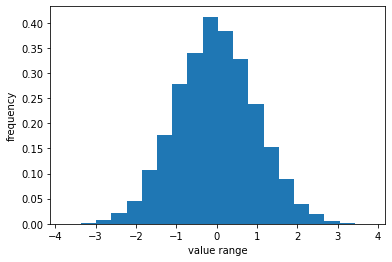

In [11]:
plt.hist(log_transformed, bins=20, density=True)
#plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

* Apply Box-Cox transformation.

In [12]:
from scipy.stats import boxcox
vals_bc = boxcox(vals, 0.0)
_, p = normaltest(vals_bc)
print(f"significance: {p:.2f}")

significance: 0.46


* Box-Cox transform is normal-like.

* Plot the Box-Cox transformed distribution.

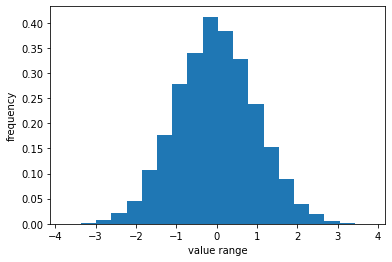

In [13]:
plt.hist(vals_bc, bins=20, density=True)
plt.ylabel("frequency")
plt.xlabel("value range");

# **Imputation**

* Replace missing values with constants or infer probable values given the other features.

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer()
df = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(df))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


* The missing values are replaced with the mean of the columns.

# **Derived Date Features**

### **Holiday Features**

* Load the holidays for the United Kingdom.

In [15]:
from workalendar.europe.united_kingdom import UnitedKingdom
UnitedKingdom().holidays()

[(datetime.date(2021, 1, 1), 'New year'),
 (datetime.date(2021, 4, 2), 'Good Friday'),
 (datetime.date(2021, 4, 4), 'Easter Sunday'),
 (datetime.date(2021, 4, 5), 'Easter Monday'),
 (datetime.date(2021, 5, 3), 'Early May Bank Holiday'),
 (datetime.date(2021, 5, 31), 'Spring Bank Holiday'),
 (datetime.date(2021, 8, 30), 'Late Summer Bank Holiday'),
 (datetime.date(2021, 12, 25), 'Christmas Day'),
 (datetime.date(2021, 12, 26), 'Boxing Day'),
 (datetime.date(2021, 12, 27), 'Christmas Shift'),
 (datetime.date(2021, 12, 28), 'Boxing Day Shift')]

* Get holidays for other places, for example, California, USA.
* Extract lists of holidays, and add custom holidays.

In [16]:
from typing import List
from dateutil.relativedelta import relativedelta, TH
import datetime
from workalendar.usa import California

def create_custom_holidays(year) -> List:
      custom_holidays = California().holidays()
      custom_holidays.append((
        (datetime.datetime(year, 11, 1) + relativedelta(weekday=TH(+4)) + datetime.timedelta(days=1)).date(),
        "Black Friday"
      ))
      return {k: v for (k, v) in custom_holidays}

custom_holidays = create_custom_holidays(2021)

In [17]:
custom_holidays

{datetime.date(2021, 1, 1): 'New year',
 datetime.date(2021, 1, 18): 'Birthday of Martin Luther King, Jr.',
 datetime.date(2021, 2, 15): "Washington's Birthday",
 datetime.date(2021, 3, 31): 'Cesar Chavez Day',
 datetime.date(2021, 5, 31): 'Memorial Day',
 datetime.date(2021, 7, 4): 'Independence Day',
 datetime.date(2021, 7, 5): 'Independence Day (Observed)',
 datetime.date(2021, 9, 6): 'Labor Day',
 datetime.date(2021, 11, 11): 'Veterans Day',
 datetime.date(2021, 11, 25): 'Thanksgiving Day',
 datetime.date(2021, 11, 26): 'Black Friday',
 datetime.date(2021, 12, 24): 'Christmas Day (Observed)',
 datetime.date(2021, 12, 25): 'Christmas Day',
 datetime.date(2021, 12, 31): 'New Years Day (Observed)'}

In [18]:
def is_holiday(current_date: datetime.date):
    """Determine if we have a holiday."""
    return custom_holidays.get(current_date, False)

today = datetime.date(2021, 4, 11)
is_holiday(today)

False

### **Date Annotations**

In [19]:
import calendar

calendar.monthrange(2021, 1)

(4, 31)

* monthrange returns the first weekday of the month and the number of days in a
month for a given year and month. 
* The day of the week is given as an integer, where Monday is 0 and Sunday is 6.
* This means the first weekday of 2021 was a Friday. January 2021 had 31 days.

In [20]:
from datetime import date
def year_anchor(current_date: datetime.date):
      return (
        (current_date - date(current_date.year, 1, 1)).days,
        (date(current_date.year, 12, 31) - current_date).days,
      )

year_anchor(today)

(100, 264)

* The following function provides the number of days since the end of the previous year and to the end of the current year.

* Extract the number of days from the first of the month and to the
end of the month.

In [21]:
def month_anchor(current_date: datetime.date):
      last_day = calendar.monthrange(current_date.year, current_date.month)[0]
    
      return (
        (current_date - datetime.date(current_date.year, current_date.month, 1)).days,
        (current_date - datetime.date(current_date.year, current_date.month, last_day)).days,
      )

month_anchor(today)

(10, 8)

### **Paydays**

* Most people would get paid on the last Friday of the month.
* Write a function for this.

In [22]:
def get_last_friday(current_date: datetime.date, weekday=calendar.FRIDAY):
      return max(week[weekday]
        for week in calendar.monthcalendar(
            current_date.year, current_date.month
        ))

get_last_friday(today)

30

### **Seasons**

* Get the season for a specific date.

In [23]:
YEAR = 2021
seasons = [
    ('winter', (date(YEAR,  1,  1),  date(YEAR,  3, 20))),
    ('spring', (date(YEAR,  3, 21),  date(YEAR,  6, 20))),
    ('summer', (date(YEAR,  6, 21),  date(YEAR,  9, 22))),
    ('autumn', (date(YEAR,  9, 23),  date(YEAR, 12, 20))),
    ('winter', (date(YEAR, 12, 21),  date(YEAR, 12, 31)))
]

def is_in_interval(current_date: datetime.date, seasons):
      return next(season for season, (start, end) in seasons
                if start <= current_date.replace(year=YEAR) <= end)
    
is_in_interval(today, seasons)

'spring'

### **Sun and Moon**

* The Astral module offers information about sunrise, moon phases, and more. 
* Get the hours of sunlight for a given day in London.

In [24]:
!pip install astral

In [25]:
from astral.sun import sun
from astral import LocationInfo
CITY = LocationInfo("London", "England", "Europe/London", 51.5, -0.116)
def get_sunrise_dusk(current_date: datetime.date, city_name='London'):
      s = sun(CITY.observer, date=current_date)
      sunrise = s['sunrise']
      dusk = s['dusk']
      return (sunrise - dusk).seconds / 3600

get_sunrise_dusk(today)

9.788055555555555

### **Business Days**

* The following function extracts the number of business days and weekends/holidays in a month.

In [27]:
def get_business_days(current_date: datetime.date):
      last_day = calendar.monthrange(current_date.year, current_date.month)[1]
      rng = pd.date_range(current_date.replace(day=1), periods=last_day, freq='D')
      business_days = pd.bdate_range(rng[0], rng[-1])
      return len(business_days), last_day - len(business_days)

get_business_days(date.today())

(22, 8)

### **Automated Feature Extraction**

* Featuretools calculates many datetime-related functions.

In [28]:
import featuretools as ft
from featuretools.primitives import Minute, Hour, Day, Month, Year, Weekday

data = pd.DataFrame(
    {'Time': ['2014-01-01 01:41:50',
              '2014-01-01 02:06:50',
              '2014-01-01 02:31:50',
              '2014-01-01 02:56:50',
              '2014-01-01 03:21:50'],
     'Target': [0, 0, 0, 0, 1]}
)        
data['index'] = data.index
es = ft.EntitySet('My EntitySet')
es.entity_from_dataframe(
    entity_id='main_data_table',
    index='index',
    dataframe=data,
    time_index='Time'
)
fm, features = ft.dfs(
    entityset=es, 
    target_entity='main_data_table', 
    trans_primitives=[Minute, Hour, Day, Month, Year, Weekday]
)

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "


In [29]:
fm

,Target,DAY(Time),HOUR(Time),MINUTE(Time),MONTH(Time),WEEKDAY(Time),YEAR(Time)
index,,,,,,,
0,0,1,1,41,1,2,2014
1,0,1,2,6,1,2,2014
2,0,1,2,31,1,2,2014
3,0,1,2,56,1,2,2014
4,1,1,3,21,1,2,2014


### **ROCKET**

* Load an example time-series in SkTime.

In [31]:
from sktime.datasets import load_arrow_head
from sktime.utils.data_processing import from_nested_to_2d_array
# please note that this import changes in version 0.8:
# from sktime.datatypes._panel._convert import from_nested_to_2d_array

X_train, y_train = load_arrow_head(split="train", return_X_y=True)
from_nested_to_2d_array(X_train).head()

,dim_0__0,dim_0__1,dim_0__2,dim_0__3,dim_0__4,dim_0__5,dim_0__6,dim_0__7,dim_0__8,dim_0__9,dim_0__10,dim_0__11,dim_0__12,dim_0__13,dim_0__14,dim_0__15,dim_0__16,dim_0__17,dim_0__18,dim_0__19,dim_0__20,dim_0__21,dim_0__22,dim_0__23,dim_0__24,dim_0__25,dim_0__26,dim_0__27,dim_0__28,dim_0__29,dim_0__30,dim_0__31,dim_0__32,dim_0__33,dim_0__34,dim_0__35,dim_0__36,dim_0__37,dim_0__38,dim_0__39,...,dim_0__211,dim_0__212,dim_0__213,dim_0__214,dim_0__215,dim_0__216,dim_0__217,dim_0__218,dim_0__219,dim_0__220,dim_0__221,dim_0__222,dim_0__223,dim_0__224,dim_0__225,dim_0__226,dim_0__227,dim_0__228,dim_0__229,dim_0__230,dim_0__231,dim_0__232,dim_0__233,dim_0__234,dim_0__235,dim_0__236,dim_0__237,dim_0__238,dim_0__239,dim_0__240,dim_0__241,dim_0__242,dim_0__243,dim_0__244,dim_0__245,dim_0__246,dim_0__247,dim_0__248,dim_0__249,dim_0__250
0,-1.9630,-1.9578,-1.9561,-1.9383,-1.8967,-1.8699,-1.8387,-1.8123,-1.7364,-1.6733,-1.6231,-1.5859,-1.5438,-1.4568,-1.3787,-1.2925,-1.21700,-1.10900,-0.96869,-0.83160,-0.76030,-0.59963,-0.46626,-0.30638,-0.226850,-0.089760,0.041376,0.232040,0.387290,0.41471,0.51567,0.62615,0.72741,0.75345,0.78002,0.83840,0.88817,0.91982,0.93344,0.98346,...,1.08840,1.03130,0.91714,0.79702,0.76474,0.67662,0.66052,0.63566,0.59248,0.56744,0.51976,0.439930,0.412770,0.253300,0.135090,-0.00904,-0.11717,-0.17430,-0.31576,-0.48674,-0.61859,-0.68387,-0.81899,-0.95635,-1.0827,-1.1414,-1.2536,-1.3567,-1.4456,-1.5298,-1.5839,-1.6553,-1.7192,-1.7509,-1.7963,-1.8413,-1.8843,-1.9054,-1.9239,-1.9092
1,-1.7746,-1.7740,-1.7766,-1.7307,-1.6963,-1.6574,-1.6362,-1.6098,-1.5434,-1.4862,-1.4556,-1.3918,-1.3206,-1.2597,-1.2183,-1.1463,-1.05210,-0.94823,-0.89340,-0.78590,-0.68385,-0.57293,-0.49670,-0.38616,-0.258410,-0.172810,-0.095278,0.004288,0.126460,0.20265,0.25230,0.36048,0.44598,0.52666,0.58079,0.63373,0.71462,0.73761,0.76459,0.83141,...,0.89162,0.88277,0.81642,0.77211,0.67929,0.65059,0.56274,0.52486,0.42696,0.35558,0.24436,0.180350,0.103110,-0.004011,-0.105820,-0.16730,-0.29297,-0.40340,-0.53115,-0.59018,-0.71153,-0.82841,-0.93333,-0.97546,-1.0765,-1.1675,-1.2363,-1.2775,-1.3541,-1.4076,-1.4717,-1.4847,-1.5400,-1.5902,-1.6357,-1.6400,-1.6787,-1.7292,-1.7757,-1.7893
2,-1.8660,-1.8420,-1.8350,-1.8119,-1.7644,-1.7077,-1.6483,-1.5826,-1.5315,-1.4936,-1.4153,-1.3317,-1.2629,-1.1506,-1.0464,-0.9921,-0.89875,-0.77256,-0.67161,-0.55116,-0.42277,-0.35821,-0.24924,-0.14184,-0.037354,0.101860,0.200900,0.278590,0.368170,0.50153,0.61607,0.68695,0.80943,0.82867,0.92148,0.98785,1.02960,1.12390,1.19420,1.22500,...,0.99820,1.00190,0.95461,0.91235,0.86455,0.77262,0.69568,0.59285,0.53194,0.45686,0.37511,0.234660,0.141910,0.015738,-0.044183,-0.16671,-0.27170,-0.39825,-0.50710,-0.63458,-0.69734,-0.78851,-0.90875,-1.01570,-1.1061,-1.2007,-1.2699,-1.3427,-1.4291,-1.5101,-1.5841,-1.6523,-1.6846,-1.7440,-1.7991,-1.8291,-1.8758,-1.8625,-1.8634,-1.8465
3,-2.0738,-2.0733,-2.0446,-2.0383,-1.9590,-1.8745,-1.8056,-1.7310,-1.7127,-1.6280,-1.5580,-1.4414,-1.3616,-1.3062,-1.1958,-1.0956,-0.97564,-0.93206,-0.81764,-0.69824,-0.55145,-0.40404,-0.32737,-0.19953,-0.078366,0.018063,0.100950,0.119300,0.150570,0.24654,0.33330,0.41427,0.41516,0.53813,0.60889,0.72698,0.88807,0.97536,1.08520,1.15480,...,1.07620,0.92948,0.77857,0.65162,0.56127,0.47331,0.40662,0.36935,0.32316,0.29125,0.23271,0.141780,0.083143,-0.004184,-0.058296,-0.17007,-0.26560,-0.39417,-0.57000,-0.64499,-0.76294,-0.88116,-0.98501,-1.06800,-1.1205,-1.2351,-1.3461,-1.4579,-1.5292,-1.6076,-1.6789,-1.7437,-1.8198,-1.8581,-1.8861,-1.9512,-2.0129,-2.0270,-2.0734,-2.0753
4,-1.7463,-1.7413,-1.7227,-1.6986,-1.6772,-1.6304,-1.5794,-1.5512,-1.4740,-1.4594,-1.3931,-1.3371,-1.2969,-1.2145,-1.1225,-1.0785,-0.98305,-0.93018,-0.85028,-0.73181,-0.68215,-0.57796,-0.51454,-0.40571,-0.275750,-0.210810,-0.122090,-0.058664,0.045266,0.16458,0.23316,0.32514,0.39004,0.44007,0.55048,0.57534,0.67715,0.79104,0.84626,0.91361,...,0.75205,0.69485,0.63655,0.57811,0.50993,0.39952,0.34948,0.23160,0.20920,0.11410,-0.01531,-0.049623,-0.182530,-0.291080,-0.

In [32]:
from sktime.transformations.panel.rocket import Rocket
rocket = Rocket(num_kernels=1000)
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

### **Shapelets**

In [33]:
from sktime.transformations.panel.shapelets import ContractedShapeletTransform
shapelets_transform = ContractedShapeletTransform(
    time_contract_in_mins=1,
    num_candidates_to_sample_per_case=10,
    verbose=0,
)
shapelets_transform.fit(X_train, y_train)

ContractedShapeletTransform(num_candidates_to_sample_per_case=10,
                            time_contract_in_mins=1)

In [34]:
X_train_transform = shapelets_transform.transform(X_train)

In [35]:
X_train_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.425224,0.204021,0.133638,0.165957,0.257050,0.295289,0.016927,0.158281,0.031351,0.171958,0.034489,0.150097,1.424467,0.367811,0.097601,0.368838,0.131081,0.011627,0.016675,0.008099,0.041950,0.029546,0.016014,0.125658,0.055914,0.090589
1,0.858237,0.265619,0.193746,0.297775,0.648669,0.867717,0.037880,0.111854,0.003921,0.024709,0.029829,0.028594,1.415290,0.023602,0.045375,0.067862,0.179164,0.011393,0.010308,0.007796,0.007739,0.009461,0.020074,0.075584,0.036066,0.062378
2,0.690759,0.310732,0.211582,0.371205,0.570994,0.636221,0.059942,0.156333,0.012799,0.060049,0.053861,0.038065,1.460121,0.031537,0.031889,0.130717,0.165630,0.005601,0.012593,0.008186,0.002911,0.021762,0.019687,0.069033,0.020294,0.095612
3,0.181270,0.029804,0.122085,0.022880,0.114984,0.068982,0.026410,0.269639,0.054214,0.446133,0.166821,0.369263,1.275535,0.713320,0.404717,0.782436,0.100716,0.031544,0.053725,0.003258,0.154723,0.061343,0.052785,0.197587,0.098278,0.067792
4,0.737389,0.247438,0.165319,0.270187,0.582669,0.746036,0.056506,0.067152,0.010448,0.014405,0.030238,0.013705,1.325250,0.009796,0.018787,0.142533,0.139341,0.013489,0.026822,0.008686,0.014890,0.040592,0.025775,0.138027,0.056030,0.137032
5,0.892243,0.267835,0.142192,0.269629,0.605526,0.912147,0.067879,0.092585,0.024692,0.058339,0.036256,0.054452,1.339301,0.099199,0.099179,0.075245,0.083709,0.015189,0.080822,0.009467,0.043406,0.008213,0.072115,0.013609,0.028435,0.500169
6,0.245074,0.152721,0.000000,0.128439,0.225594,0.278462,0.051797,0.503883,0.038668,0.506510,0.366865,0.338643,1.004125,0.565823,0.579437,0.699475,0.063954,0.028940,0.097586,0.003611,0.485885,0.065516,0.058896,0.062259,0.072415,0.113530
7,0.830644,0.285712,0.153936,0.293947,0.658002,0.874670,0.026440,0.054148,0.012995,0.000000,0.029728,0.036444,1.310321,0.027431,0.037374,0.144163,0.151470,0.015541,0.042180,0.008056,0.033260,0.054010,0.038726,0.144584,0.083904,0.133604
8,0.812087,0.271966,0.232856,0.321318,0.620641,0.782504,0.044307,0.146059,0.008335,0.044843,0.051568,0.038028,1.434238,0.029572,0.038525,0.074108,0.216882,0.005567,0.008428,0.008380,0.000000,0.011519,0.009858,0.058785,0.032864,0.088841
9,0.161922,0.029235,0.069993,0.041986,0.375352,0.000000,0.037193,0.467022,0.055156,0.675901,0.268943,0.439223,1.039284,0.543366,0.668404,1.016044,0.159526,0.010700,0.054702,0.016215,0.218433,0.038365,0.097392,0.140843,0.081001,0.175019


* This gives a transformed dataset that can use in machine learning models. 